In [1]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv(mouse_drug_data_to_load)
df2 = pd.read_csv(clinical_trial_data_to_load)
#encoding="ISO-8859-1

# Combine the data into a single dataset
merge_table = pd.merge(df1, df2, on="Mouse ID", how="inner")
merge_table.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
#Create groupby object and convert to dataframe;"tumor vol vs timepoint" for each drug 
grouped_data_vol_df = merge_table.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
tumorvol_pivot = pd.pivot_table(grouped_data_vol_df, values = 'Tumor Volume (mm3)', index = ['Timepoint'], columns = 'Drug')

#convert back to df
qwe_df = pd.DataFrame(tumorvol_pivot)
qwe_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# and convert to dataframe
standard_error_tumor_vol_df = merge_table.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

#rename output column as 'tumor vol SE' (standard error)
standard_error_tumor_vol_df = standard_error_tumor_vol_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Vol SE'})
standard_error_tumor_vol_df.head(50)

#convert to pivot table to easily reorganize columns/rows
SE_pivot = pd.pivot_table(standard_error_tumor_vol_df, values = 'Tumor Vol SE', index = ['Timepoint'], columns = 'Drug')
SE_pivot.head()

#convert back to df
uio_df = pd.DataFrame(SE_pivot)
uio_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


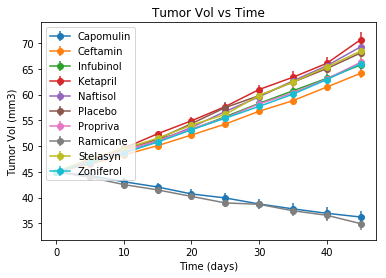

In [4]:
#Create list of drug names (would be better to retrieve this from a dataframe)
drug_list = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
num_drugs = len(drug_list)

#plot with error bars for each drug
for i in range(0, num_drugs):
    x = qwe_df.index
    y = qwe_df.iloc[:, i]
    t_error = uio_df.iloc[:, i]
    plt.errorbar(x, y, yerr=t_error, marker='o', label = drug_list[i])


#plot labels of "tumor vol vs timepoint" 
plt.title("Tumor Vol vs Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Vol (mm3)") 
plt.legend(loc='upper left')

Text(0, 0.5, 'Tumor Vol (mm3)')

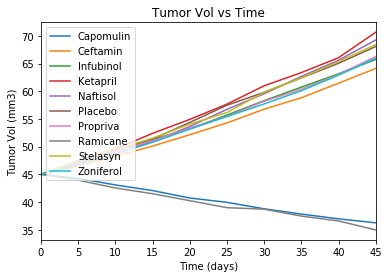

In [5]:
#efficient plot including proper legend, w/out error bars
tumorvol_pivot.plot()
plt.legend(loc='upper left')
plt.title("Tumor Vol vs Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Vol (mm3)")

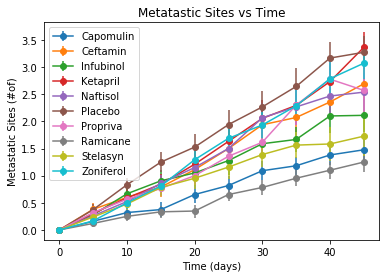

In [6]:
#Create groupby object and convert to dataframe; "metastatic (cancer spreading) sites vs timepoint" for each drug
grouped_data_metastatic_df = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
metatastic_pivot = pd.pivot_table(grouped_data_metastatic_df, values = 'Metastatic Sites',
                                index = ['Timepoint'], columns = 'Drug')
#convert back to df
abc_df = pd.DataFrame(metatastic_pivot)

#Convert groupby object and convert to df; "SE of Metatastic Sites vs Time"
standard_error_meta_sites_df = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()

#Convert to pivot to easily set desired rows/columns
sites_error_pivot = pd.pivot_table(standard_error_meta_sites_df, values = 'Metastatic Sites', index = ['Timepoint'], columns = 'Drug')

#Convert back to df
fgt_df = pd.DataFrame(sites_error_pivot)


#plot with error bars for each drug
for i in range(0, num_drugs):
    x = abc_df.index
    y = abc_df.iloc[:, i]
    o_error = fgt_df.iloc[:, i]
    plt.errorbar(x, y, yerr=o_error, marker='o', label = drug_list[i])
    
#plot labels of "metatastic sites vs time"
plt.title("Metatastic Sites vs Time")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites (#of)") 
plt.legend(loc='best')

Text(0, 0.5, 'Metastatic Sites (# of)')

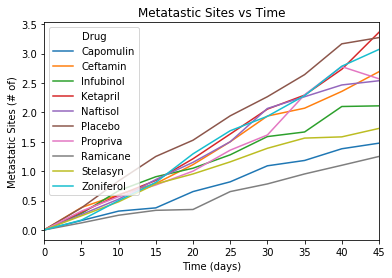

In [7]:
#efficient plot including proper legend, w/out error bars
metatastic_pivot.plot()
plt.title("Metatastic Sites vs Time")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites (# of)")

In [8]:
#Goal: Creating a scatter plot that shows the number of mice still alive
#through the course of treatment (Survival Rate)

#Create groupby object and convert to dataframe; current output is #of mice alive
grouped_data_micenum_df = merge_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].count().reset_index()

#Create copy of dataframe so we can add a column containing Survival Rates
grouped_data_survivalrate_df = grouped_data_micenum_df

#Calculate percentage of mice remaining and store output in new column named 'Survival Rate'
grouped_data_survivalrate_df['Survival Rate'] = grouped_data_survivalrate_df['Metastatic Sites']/25*100
grouped_data_survivalrate_df.head(20)

#convert dataframe to pivot table so we can have each column represent a different drug; rows are timepoint
#output is now Survival Rate (percentage of mice remaining)  
micesurvivalrate_pivot = pd.pivot_table(grouped_data_survivalrate_df, values = 'Survival Rate', index = ['Timepoint'], columns = 'Drug')
micesurvivalrate_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


Text(0, 0.5, 'Survival Rate (%)')

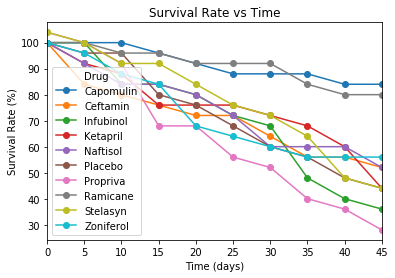

In [9]:
#create efficient plot of "Survival Rate vs Time", error bars n/a for this plot
micesurvivalrate_pivot.plot(marker='o')
plt.title('Survival Rate vs Time')
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

In [10]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days

#Create a copy of earlier dataframe; "tumor vol vs timepoint" for each drug 
tumor_vol_df = grouped_data_vol_df
tumor_vol_df.head(20)

#We only want final volumes (at timepoint=45)
final_tumor_vol_df = tumor_vol_df.loc[tumor_vol_df['Timepoint'] == 45]
final_tumor_vol_df.head(10)

#initial volume of all tumors is 45
initial_vol = 45

#Calculate percentage change of tumor vol and store output in new column named 'Change'
final_tumor_vol_df['Change'] = (final_tumor_vol_df['Tumor Volume (mm3)']-initial_vol)/initial_vol*100
final_tumor_vol_df
final_tumor_vol_df.head()

#locate values of %change in vol
change_list = final_tumor_vol_df.loc[:, 'Change']

#create list with only drug names and corresponding %change
final_change_list = list(zip(drug_list, change_list.values))
final_change_list_df = pd.DataFrame(final_change_list)
final_change_list_df.head()


        


,0,1
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347


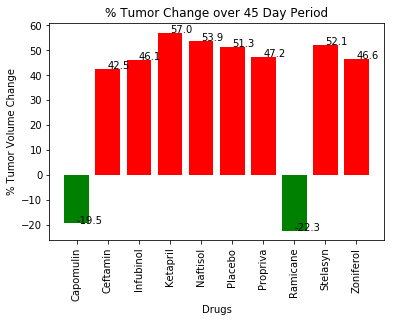

In [11]:
#plot bar graph

#define empty lists that will separate +%change and -%change
pos_index =[]
pos_value =[]
neg_index=[]
neg_value=[]

#loop through final change list and determine if each %change is +/-
#append values to appropriate +/- list
for j in range(0, num_drugs):
    if final_change_list_df.iloc[j, 1]>=0:
        pos_index.append(j)
        pos_value.append(final_change_list_df.iloc[j, 1])
    else: 
        neg_index.append(j)
        neg_value.append(final_change_list_df.iloc[j, 1])

#create bar chart        
plt.bar(pos_index, pos_value, color='r')    
plt.bar(neg_index, neg_value, color='g')       

#add labels
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change") 
plt.title("% Tumor Change over 45 Day Period")

tick_locations = [value for value in range(0, num_drugs)]
plt.xticks(tick_locations, drug_list, rotation='vertical')

#include value of each %change with drug, respectively
for a,b in zip(pos_index, pos_value):
    plt.text(a, b, str(round(b,1)))
for a,b in zip(neg_index, neg_value):
    plt.text(a, b, str(round(b,1)))


In [12]:
#Conclusions/trends based on data
print(f'Capomulin and Ramicane were the only drugs that reduced the volume of tumors')
print(f'Mice who were given Propriva had the lowest survival rate')
print(f'Mice who were given Capomulin and Ramicane had the highest survival rate')
print(f'Conclusion: Capomulin and Ramicane seem to be the most effective drugs in treating tumors and are relatively safer')

Capomulin and Ramicane were the only drugs that reduced the volume of tumors
Mice who were given Propriva had the lowest survival rate
Mice who were given Capomulin and Ramicane had the highest survival rate
Conclusion: Capomulin and Ramicane seem to be the most effective drugs in treating tumors and are relatively safer
